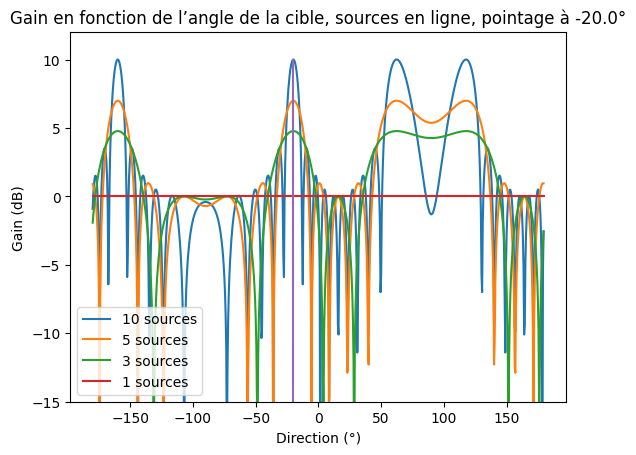

In [61]:
import numpy as np
import matplotlib.pyplot as plt

directions = np.arange(-np.pi, np.pi, np.pi/360)

c = 299_792_458              # m/s

fréquence = 2_442_000_000    # Hz
longueur_onde = c/fréquence  # m
écart_sources = 0.10         # m
num_sources = 4

direction_cible = np.radians(-20)  # Ciblage vers θ

for num_sources in [10, 5, 3, 1]:
    signaux_origine = np.asarray([
        A0 * np.exp(1j * 2*np.pi * (k*écart_sources * np.sin(directions)) / longueur_onde)
        for k in range(1, num_sources + 1)
    ])

    déphasages = np.c_[[
        np.exp(-1j * 2*np.pi * (k*écart_sources * np.sin(direction_cible)) / longueur_onde)
        for k in range(1, num_sources + 1)
    ]]

    signaux_déphasés = signaux_origine * déphasages
    somme_signaux = np.sum(signaux_déphasés, axis=0)
    gain_signaux = 10 * np.log10(np.abs(somme_signaux))

    plt.plot(np.degrees(directions), gain_signaux, label=f"{num_sources} sources")
plt.plot([np.degrees(direction_cible), np.degrees(direction_cible)], [-25, 10])
plt.ylim([-15, 12])
plt.title(f"Gain en fonction de l’angle de la cible, sources en ligne, pointage à {np.degrees(direction_cible)}°")
plt.xlabel("Direction (°)")
plt.ylabel("Gain (dB)")
plt.legend()
plt.show()

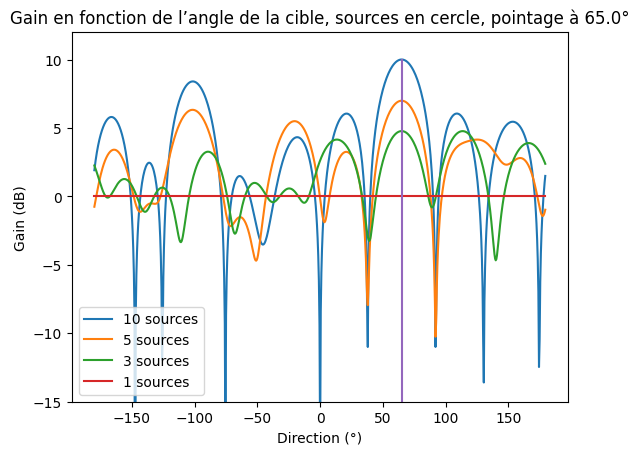

In [58]:
radius = 0.10
direction_cible = np.radians(65)
for num_sources in [10, 5, 3, 1]:
    signaux_origine = np.asarray([
        A0 * np.exp(1j * 2*np.pi * (np.abs(radius * (np.cos(2*np.pi*k / num_sources - directions) - 1))) / longueur_onde)
        for k in range(1, num_sources + 1)
    ])

    déphasages = np.c_[[
        np.exp(-1j * 2*np.pi * (np.abs(radius * (np.cos(2*np.pi*k / num_sources - direction_cible) - 1))) / longueur_onde)
        for k in range(1, num_sources + 1)
    ]]

    signaux_déphasés = signaux_origine * déphasages
    somme_signaux = np.sum(signaux_déphasés, axis=0)
    gain_signaux = 10 * np.log10(np.abs(somme_signaux))

    plt.plot(np.degrees(directions), gain_signaux, label=f"{num_sources} sources")
plt.plot([np.degrees(direction_cible), np.degrees(direction_cible)], [-25, 10])
plt.ylim([-15, 12])
plt.title(f"Gain en fonction de l’angle de la cible, sources en cercle, pointage à {np.degrees(direction_cible)}°")
plt.xlabel("Direction (°)")
plt.ylabel("Gain (dB)")
plt.legend()
plt.show()